# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# save current date for later use
current_date = time.strftime("%m/%d/%Y", time.localtime())

12/05/2020


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations -- added smaller sample to test
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['bluff', 'kumbo', 'slidell', 'taolanaro', 'sinnamary', 'cape town', 'qasigiannguit', 'atuona', 'rikitea', 'qaanaaq', 'yellowknife', 'grand gaube', 'komsomolskiy', 'mar del plata', 'varhaug', 'ushuaia', 'la rioja', 'tyukalinsk', 'donegal', 'ponta do sol', 'punta arenas', 'jamestown', 'kavieng', 'ilulissat', 'cherlak', 'gizo', 'veraval', 'margate', 'busselton', 'belyy yar', 'bayan', 'thompson', 'neftcala', 'nguiu', 'sitka', 'high prairie', 'galiwinku', 'vao', 'mys shmidta', 'katherine', 'port elizabeth', 'constitucion', 'berbera', 'puerto colombia', 'nikolskoye', 'barentsburg', 'bambous virieux', 'fairbanks', 'alofi', 'vaini', 'teahupoo', 'karratha', 'general pico', 'vale da amoreira', 'new norfolk', 'bredasdorp', 'brae', 'khromtau', 'perisoru', 'bengkulu', 'hermanus', 'jarvenpaa', 'tsihombe', 'karakendzha', 'attawapiskat', 'kapaa', 'eyl', 'carnarvon', 'asau', 'barrow', 'sorland', 'dikson', 'tomatlan', 'astoria', 'tiksi', 'gamba', 'avarua', 'swinford', 'krasnyy yar', 'bambui', 'laguna',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key + "&q="

print("Beginning Data Retrieval")
print("--------------------------------")

#set up lists to hold data retrieved in the for loop
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
country = []
datetime = []

good_city = []

cityCount = 0
# Build query URL
for city in cities:
    cityCount += 1
    print(f"Processing Record {cityCount} | {city}")
    try:
        weather_response = requests.get(base_url + city)
        weather_json = weather_response.json()
        lat.append(weather_json["coord"]["lat"])
        lon.append(weather_json["coord"]["lon"])
        temperature.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        windspeed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        datetime.append(weather_json["dt"])
        good_city.append(city)
    except: 
        print("City not found.  Skipping...")
 

Beginning Data Retrieval
--------------------------------
Processing Record 1 | bluff
Processing Record 2 | kumbo
Processing Record 3 | slidell
Processing Record 4 | taolanaro
City not found.  Skipping...
Processing Record 5 | sinnamary
Processing Record 6 | cape town
Processing Record 7 | qasigiannguit
Processing Record 8 | atuona
Processing Record 9 | rikitea
Processing Record 10 | qaanaaq
Processing Record 11 | yellowknife
Processing Record 12 | grand gaube
Processing Record 13 | komsomolskiy
Processing Record 14 | mar del plata
Processing Record 15 | varhaug
Processing Record 16 | ushuaia
Processing Record 17 | la rioja
Processing Record 18 | tyukalinsk
Processing Record 19 | donegal
Processing Record 20 | ponta do sol
Processing Record 21 | punta arenas
Processing Record 22 | jamestown
Processing Record 23 | kavieng
Processing Record 24 | ilulissat
Processing Record 25 | cherlak
Processing Record 26 | gizo
Processing Record 27 | veraval
Processing Record 28 | margate
Processing Re

Processing Record 230 | kodiak
Processing Record 231 | burnie
Processing Record 232 | hohhot
Processing Record 233 | miri
Processing Record 234 | buala
Processing Record 235 | lagoa
Processing Record 236 | darhan
Processing Record 237 | lugo
Processing Record 238 | vila velha
Processing Record 239 | konongo
Processing Record 240 | cascais
Processing Record 241 | amderma
City not found.  Skipping...
Processing Record 242 | krasnyye barrikady
Processing Record 243 | oktyabrskoye
Processing Record 244 | warqla
City not found.  Skipping...
Processing Record 245 | nanortalik
Processing Record 246 | chinchani
Processing Record 247 | saint joseph
Processing Record 248 | shchelyayur
City not found.  Skipping...
Processing Record 249 | jinchang
Processing Record 250 | hargeysa
Processing Record 251 | alice town
Processing Record 252 | lubbock
Processing Record 253 | faya
Processing Record 254 | venado
Processing Record 255 | airai
Processing Record 256 | kushmurun
Processing Record 257 | katsuu

Processing Record 463 | touho
Processing Record 464 | vilhena
Processing Record 465 | morlaix
Processing Record 466 | cassilandia
Processing Record 467 | husavik
Processing Record 468 | clifton
Processing Record 469 | porto velho
Processing Record 470 | ketchikan
Processing Record 471 | tula
Processing Record 472 | skjervoy
Processing Record 473 | nosy varika
Processing Record 474 | micheweni
Processing Record 475 | sheridan
Processing Record 476 | cordoba
Processing Record 477 | troitsko-pechorsk
Processing Record 478 | rungata
City not found.  Skipping...
Processing Record 479 | tubruq
City not found.  Skipping...
Processing Record 480 | natal
Processing Record 481 | salta
Processing Record 482 | helong
Processing Record 483 | salinopolis
Processing Record 484 | mega
Processing Record 485 | hunza
City not found.  Skipping...
Processing Record 486 | rudnyy
Processing Record 487 | taltal
Processing Record 488 | puyo
Processing Record 489 | mazatlan
Processing Record 490 | isangel
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Create the dictionary from the individual lists
city_dict = {
    "city": good_city,
    "lat": lat,
    "lon": lon,
    "maxtemp": temperature,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "datetime": datetime
}

#Convert dictionary to dataframe
city_data = pd.DataFrame(city_dict)

# Save the dataframe as a csv.
city_data.to_csv(output_data_file)

# Print the first five rows of the dataframe
city_data.head()

city          573
lat           573
lon           573
maxtemp       573
humidity      573
cloudiness    573
windspeed     573
country       573
datetime      573
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Simple method to make sure humidity levels above 100 are dropped
clean_city_data = city_data.loc[city_data["humidity"] <= 100]

In [21]:
# print the first 5 again
clean_city_data.head()

city          573
lat           573
lon           573
maxtemp       573
humidity      573
cloudiness    573
windspeed     573
country       573
datetime      573
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

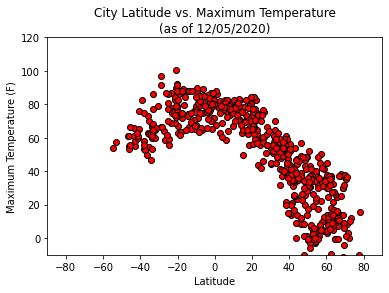

In [36]:
# Define 
temps = clean_city_data["maxtemp"]
lat = clean_city_data["lat"]

plt.scatter(lat, temps, marker="o", facecolors="red", edgecolors="black")

# Refine the display
plt.ylim(-10, 120)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Maximum Temperature\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("output_data/latitude_temperature.png")
plt.show()

This scatter plot suggests there is a strong relationship between latitude and temperature, with locations closest to the equator (Latitude = 0) being highest.  The other interesting observation from this is the lack of cities at southern latitudes -- those less than latitude < -55, as compared to the northern latitudes.  Knowing that land mass is more sparse at far southern latitudes, this makes sense.

## Latitude vs. Humidity Plot

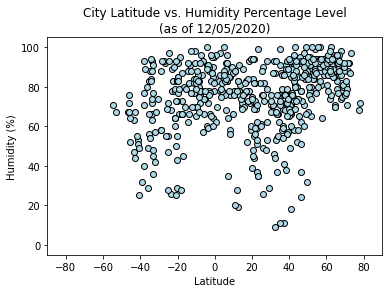

In [34]:
# Define 
humidity = clean_city_data["humidity"]
lat = clean_city_data["lat"]

plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black")

# Refine the display
plt.ylim(-5, 105)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Humidity Percentage Level\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

This plot does not seem to show much if any relationship between latitude and humidity levels.  The few low humidity cities tend to lie in a narrow band (20-40 in both north and south), suggesting a potential weaker relationship but similar to the temperature plot above.

## Latitude vs. Cloudiness Plot

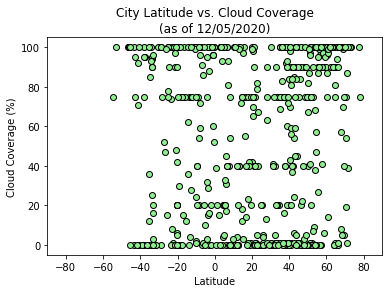

In [37]:
# Define 
humidity = clean_city_data["cloudiness"]
lat = clean_city_data["lat"]

plt.scatter(lat, cloudiness, marker="o", facecolors="lightgreen", edgecolors="black")

# Refine the display
plt.ylim(-5, 105)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Cloud Coverage\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")
plt.savefig("output_data/latitude_cloudiness.png")
plt.show()

This plot suggests no relationship between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

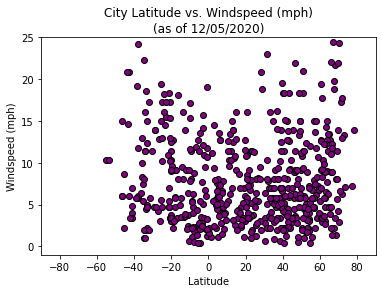

In [38]:
# Define 
humidity = clean_city_data["windspeed"]
lat = clean_city_data["lat"]

plt.scatter(lat, windspeed, marker="o", facecolors="purple", edgecolors="black")

# Refine the display
plt.ylim(-1, 25)
plt.xlim(-90, 90)
plt.title("City Latitude vs. Windspeed (mph)\n(as of " + current_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig("output_data/latitude_windspeed.png")
plt.show()

The very weak u-shape to this graph suggests there might be a weak correlation between latitude and wind speed, with higher speeds found at latitudes further from the equator

## Linear Regression

In [11]:
# Create northern and southern hemisphere datasets.  
northern_city_data = clean_city_data.loc[city_data["lat"] >= 0]
southern_city_data = clean_city_data.loc[city_data["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

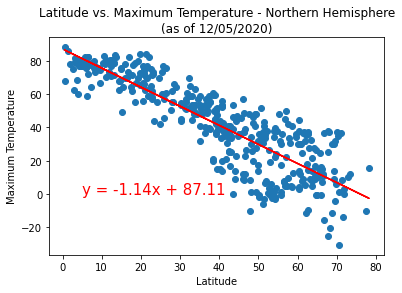

R-squared = 0.7364227405649177


In [53]:
# Create lists
n_temp = northern_city_data["maxtemp"]
n_lat = northern_city_data["lat"]

# Find regression 
nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(n_lat, n_temp)
regress_values = n_lat * nt_slope + nt_int
line_eq = "y = " + str(round(nt_slope,2)) + "x + " + str(str(round(nt_int,2)))
plt.scatter(n_lat, n_temp)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(5, 0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Maximum Temperature - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_temperature.png")
plt.show()
print("R-squared = " + str(nt_r**2))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

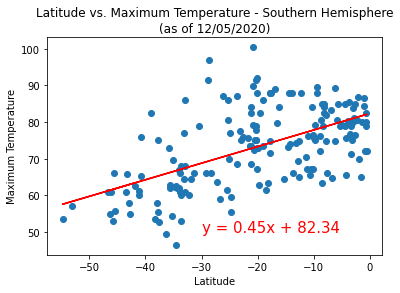

R-squared = 0.321720647731673


In [54]:
# Create lists
s_temp = southern_city_data["maxtemp"]
s_lat = southern_city_data["lat"]

# Find regression 
st_slope, st_int, st_r, st_p, st_std_err = linregress(s_lat, s_temp)
regress_values = s_lat * st_slope + st_int
line_eq = "y = " + str(round(st_slope,2)) + "x + " + str(str(round(st_int,2)))
plt.scatter(s_lat, s_temp)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-30, 50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Maximum Temperature - Southern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_temperature.png")
plt.show()
print("R-squared = " + str(st_r**2))

##### Latitude vs. Temperature

As the plots show, those cities closest to the equator (latitude = 0) have the higher maximum temperatures.  The northern hemisphere has a higher R-squared value than the southern, suggesting the regression line fits the data much better in the northern data set than southern.  Also, in looking at the plots, there seem to be more "outliers" in the southern dataset.  However, temperature and latitude do seem to be strongly related.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

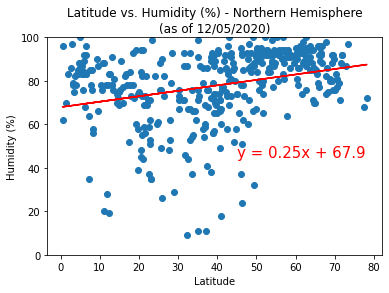

R-squared = 0.0862094075741113


In [55]:
# Create lists
n_humidity = northern_city_data["humidity"]
n_lat = northern_city_data["lat"]

# Find regression 
nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(n_lat, n_humidity)
regress_values = n_lat * nh_slope + nh_int
line_eq = "y = " + str(round(nh_slope,2)) + "x + " + str(str(round(nh_int,2)))
plt.scatter(n_lat, n_humidity)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_humidity.png")
plt.show()
print("R-squared = " + str(nh_r**2))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

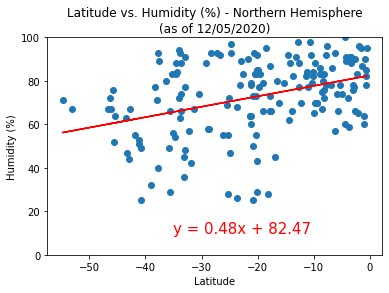

R-squared = 0.13950769743363464


In [56]:
# Create lists
s_humidity = southern_city_data["humidity"]
s_lat = southern_city_data["lat"]

# Find regression 
sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(s_lat, s_humidity)
regress_values = s_lat * sh_slope + sh_int
line_eq = "y = " + str(round(sh_slope,2)) + "x + " + str(str(round(sh_int,2)))
plt.scatter(s_lat, s_humidity)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-35, 10),fontsize=15,color="red")
plt.ylim(0,100)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs. Humidity (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_humidity.png")
plt.show()
print("R-squared = " + str(sh_r**2))

##### Latitude vs. Humidity

As the R-squared values for these two plots show, neither regression equation is a very good fit for the humidity data. The lower humidity cities do seem to cluster around 10 - 15 degrees from the equator either direction, going to around 45 - 50 degrees.  However, the two plots show a different relationship between latitude and humidity. In the northern hemisphere, humidity levels are slightly higher the further the city is from the equator.  In the southern hemisphere, the opposite is true.  Neither line's slope is particularly large.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

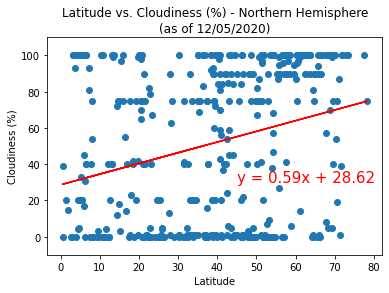

R-squared = 0.08035172906452992


In [58]:
# Create lists
n_clouds = northern_city_data["cloudiness"]
n_lat = northern_city_data["lat"]

# Find regression 
nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(n_lat, n_clouds)
regress_values = n_lat * nc_slope + nc_int
line_eq = "y = " + str(round(nc_slope,2)) + "x + " + str(str(round(nc_int,2)))
plt.scatter(n_lat, n_clouds)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.ylim(-10,110)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_cloudiness.png")
plt.show()
print("R-squared = " + str(nc_r**2))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

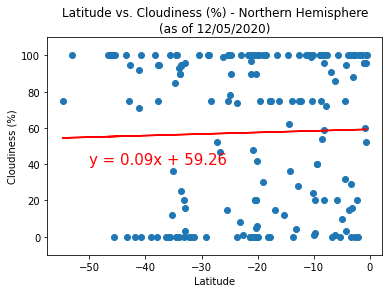

R-squared = 0.0007849859142310613


In [59]:
# Create lists
s_clouds = southern_city_data["cloudiness"]
s_lat = southern_city_data["lat"]

# Find regression 
sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(s_lat, s_clouds)
regress_values = s_lat * sc_slope + sc_int
line_eq = "y = " + str(round(sc_slope,2)) + "x + " + str(str(round(sc_int,2)))
plt.scatter(s_lat, s_clouds)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-50, 40),fontsize=15,color="red")
plt.ylim(-10,110)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Latitude vs. Cloudiness (%) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_cloudiness.png")
plt.show()
print("R-squared = " + str(sc_r**2))

##### Latitude vs. Cloudiness

The regression for the southern hemisphere data comparing latitude and cloudiness is such a bad fit (R-squared = .0008) and the line is so flat that there does not appear to be much if any relationship between latitude and cloudiness.  The northern hemisphere slope is higher, suggesting those cities closest to the equator have less cloudiness than those further, but the low R-squared value (.08) suggests this equation is a poor fit with the data and the relationship may not, in fact, exist.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

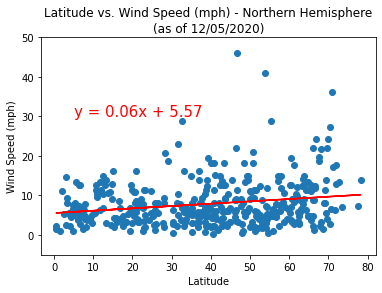

R-squared = 0.03892056059447014


In [60]:
# Create lists
n_wind = northern_city_data["windspeed"]
n_lat = northern_city_data["lat"]

# Find regression 
nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(n_lat, n_wind)
regress_values = n_lat * nw_slope + nw_int
line_eq = "y = " + str(round(nw_slope,2)) + "x + " + str(str(round(nw_int,2)))
plt.scatter(n_lat, n_wind)
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.ylim(-5,50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs. Wind Speed (mph) - Northern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/northern_latitude_windspeed.png")
plt.show()
print("R-squared = " + str(nw_r**2))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

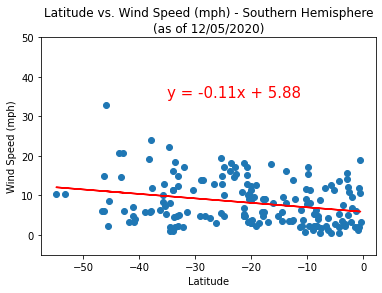

R-squared = 0.06946677782356307


In [61]:
# Create lists
s_wind = southern_city_data["windspeed"]
s_lat = southern_city_data["lat"]

# Find regression 
sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(s_lat, s_wind)
regress_values = s_lat * sw_slope + sw_int
line_eq = "y = " + str(round(sw_slope,2)) + "x + " + str(str(round(sw_int,2)))
plt.scatter(s_lat, s_wind)
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-35, 35),fontsize=15,color="red")
plt.ylim(-5,50)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Latitude vs. Wind Speed (mph) - Southern Hemisphere\n(as of " + current_date +")")
plt.savefig("output_data/southern_latitude_windspeed.png")
plt.show()
print("R-squared = " + str(sw_r**2))

##### Latitude vs. Wind Speed

The low R-squared values (northern hemisphere = .04, southern hemisphere = .07) suggest neither regression fits the data well.  However, both plots show slightly lower wind speed closer to the equator, and might suggest a weak relationship between latitude and wind speed.